In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from ipywidgets import *
import ipywidgets as widgets

from mpl_toolkits.axes_grid1 import make_axes_locatable

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'src')
functionsdir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *
from plot2D import *

## Input data dir
inputdir = os.path.join(os.path.dirname(workdir),'input')

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Own modules available: ['conditionalstats']
Own modules available: ['plot2D', 'plot1DInvLog']


In [3]:
print("import some 2D variables")
file2D = os.path.join(inputdir,'fplane_n01_300_i03_256.2Dcom_1.nc')
# varids2drop = ['SHF', 'LHF', 'LWNS', 'LWNSC', 'LWNT', 'LWNTC', 'SWNS', 'SWNSC', 'SWNT', 'SWNTC', 'IntQN', 'IntQP', 'MSE', 'USFC', 'VSFC', 'W500', 'SWVP', 'TSFC', 'QSFC']
varids2drop = []
ds_2D = xr.open_dataset(file2D,decode_cf=False,drop_variables=varids2drop)

import some 2D variables


In [4]:
pprint(np.array([f for f in ds_2D.keys()]))

Pretty printing has been turned OFF


In [5]:
print("import some 3D variables")
file3D = os.path.join(inputdir,'fplane_n01_300_i03_256_0000864000.com3D.alltimes.nc')
varids2drop = ['p', 'U', 'V', 'TABS']
ds_3D = xr.open_dataset(file3D,decode_cf=False,drop_variables=varids2drop)

import some 3D variables


In [6]:
print("pick reference time")
dt_2D = np.diff(ds_2D.time)[0] # days
dt_3D = np.diff(ds_3D.time)[0] # days
dt_ratio = int(dt_3D/dt_2D)
# Extract times corresponding to 3D data
s_2Dto3D = slice(dt_ratio-1,None,dt_ratio)
time = ds_2D.time[s_2Dto3D]
nt = len(time)

# t_0 = 50 # days
# i_t2D = int(t_0/dt_2D)
# i_t3D = int(t_0/dt_3D)

pick reference time


In [7]:
dt_2D, dt_3D, dt_ratio

(0.125, 1.0, 8)

In [8]:
print("compute distribution of reference variable")
ref_varid = 'PW'
data = ds_2D[ref_varid][s_2Dto3D].values
verbose = False
window_ref = 5
# Initialize
ref_dist_linear = DistributionOverTime(name=ref_varid,width=window_ref,time_ref=time,nlb=50)

compute distribution of reference variable


In [9]:
# Compute
ref_dist_linear.computeDistributions(sample=data)

In [10]:
# Compute locations of reference bins
ref_dist_linear.storeSamplePoints(sample=data,verbose=verbose)

0_5 ; 1_6 ; 2_7 ; 3_8 ; 4_9 ; 5_10 ; 6_11 ; 7_12 ; 8_13 ; 9_14 ; 10_15 ; 11_16 ; 12_17 ; 13_18 ; 14_19 ; 15_20 ; 16_21 ; 17_22 ; 18_23 ; 19_24 ; 20_25 ; 21_26 ; 22_27 ; 23_28 ; 24_29 ; 25_30 ; 26_31 ; 27_32 ; 28_33 ; 29_34 ; 30_35 ; 31_36 ; 32_37 ; 33_38 ; 34_39 ; 35_40 ; 36_41 ; 37_42 ; 38_43 ; 39_44 ; 40_45 ; 41_46 ; 42_47 ; 43_48 ; 44_49 ; 45_50 ; 46_51 ; 47_52 ; 48_53 ; 49_54 ; 50_55 ; 51_56 ; 52_57 ; 53_58 ; 54_59 ; 55_60 ; 56_61 ; 57_62 ; 58_63 ; 59_64 ; 60_65 ; 61_66 ; 62_67 ; 63_68 ; 64_69 ; 65_70 ; 66_71 ; 67_72 ; 68_73 ; 69_74 ; 70_75 ; 71_76 ; 72_77 ; 73_78 ; 74_79 ; 75_80 ; 76_81 ; 77_82 ; 78_83 ; 79_84 ; 80_85 ; 81_86 ; 82_87 ; 83_88 ; 84_89 ; 85_90 ; 86_91 ; 87_92 ; 88_93 ; 89_94 ; 90_95 ; 91_96 ; 92_97 ; 93_98 ; 94_99 ; 95_100 ; 


In [11]:
print("compute conditional distribution for a 2D variable")
verbose = True
cond_varid_2D = 'Prec'
data = ds_2D[cond_varid_2D][s_2Dto3D].values
# Initialize
cond_dist_2D = ConditionalDistributionOverTime(name=cond_varid_2D,
                                               time_ref=time,
                                               width = window_ref,
                                               is3D=False,
                                               on=ref_dist_linear)

compute conditional distribution for a 2D variable


In [12]:
# Compute conditional distributions
cond_dist_2D.computeConditionalStatsOverTime(sample=data)

showing conditional distribution of 2D variable


<IPython.core.display.Javascript object>


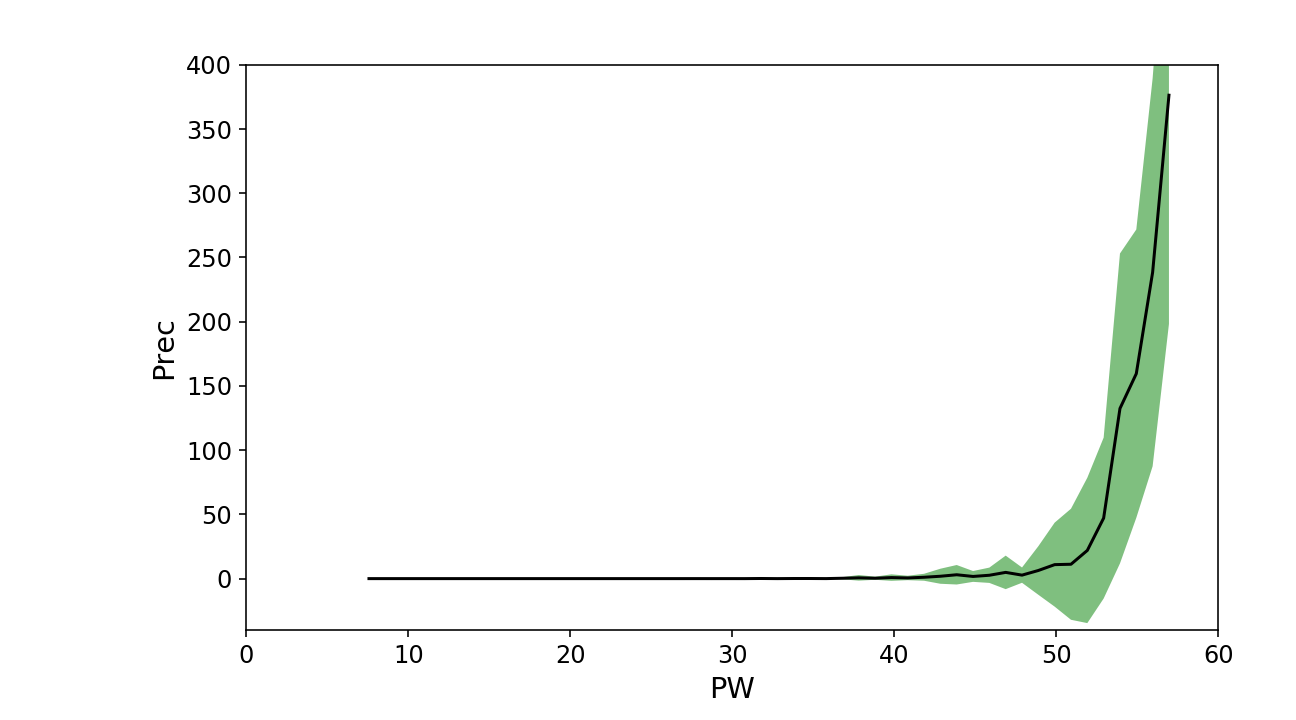

interactive(children=(IntSlider(value=2, description='Time', max=96, min=2), Output()), _dom_classes=('widget-…

In [13]:
%matplotlib nbagg
print("showing conditional distribution of 2D variable")

fig,ax = plt.subplots(figsize=(9,5))

def show(i_t):
    
    d = cond_dist_2D.cond_distributions[i_t-cond_dist_2D.dn]
    plt.cla()
    # plot mean
    ax.plot(d.on.percentiles,d.cond_mean,'k')
    # plot 1-sigma standard error
    x = d.on.percentiles
    y1 = d.cond_mean - np.sqrt(d.cond_var)
    y2 = d.cond_mean + np.sqrt(d.cond_var)
    m = np.logical_not(np.logical_or(np.isnan(x),np.isnan(d.cond_var)))
    x = x[m]
    y1 = y1[m]
    y2 = y2[m]
    print(m.sum())
    ax.fill_between(x,y1,y2,where=y2>=y1,facecolor='g',alpha=0.5,interpolate=True)

    ax.set_xlabel(ref_varid)
    ax.set_ylabel(cond_varid_2D)
    ax.set_xlim((0,60))
    ax.set_ylim((-40,400))

    plt.show()
    

i_t = widgets.IntSlider(min=cond_dist_2D.dn,max=cond_dist_2D.nt-2*cond_dist_2D.dn,step=1,value=0,description='Time')

interact(show,i_t=i_t);

In [121]:
print("compute conditional distribution for a 3D variable")
# cond_varid_3D = 'W'
cond_varid_3D = 'QRAD'
data = ds_3D[cond_varid_3D].values
window_cond = window_ref
# Initialize
cond_dist_3D = ConditionalDistributionOverTime(name=cond_varid_3D,
                                               time_ref=time,
                                               width=window_cond,
                                               is3D=True,
                                               isTime=True,
                                               on=ref_dist_linear)
# Compute conditional distributions
cond_dist_3D.computeConditionalStatsOverTime(data)

compute conditional distribution for a 3D variable


showing conditional distribution of 2D variable


<IPython.core.display.Javascript object>


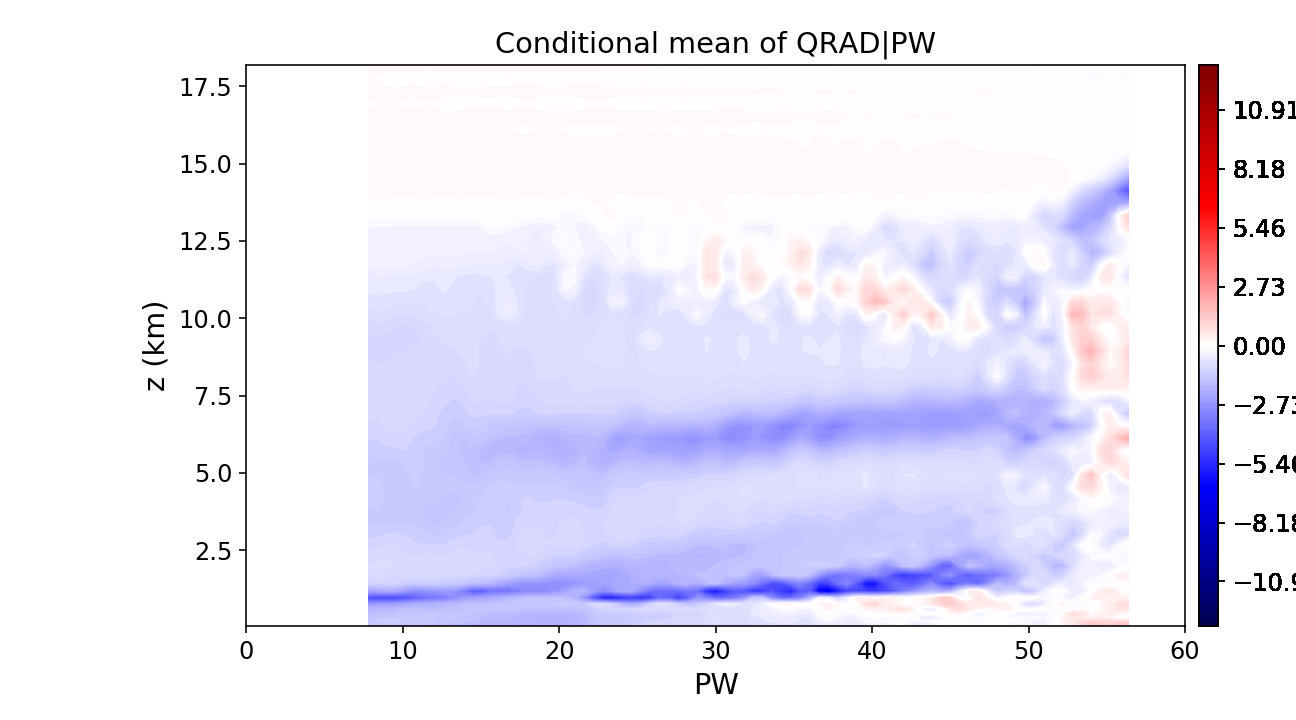

interactive(children=(IntSlider(value=2, description='Time', max=96, min=2), Output()), _dom_classes=('widget-…

In [122]:
%matplotlib nbagg

print("showing conditional distribution of 3D variable")

fig,ax = plt.subplots(figsize=(9,5))
i_tmin = 10 + cond_dist_3D.dn

# min-max values of conditional mean
mins = [np.nanmin(cond_dist_3D.cond_distributions[i_t].cond_mean) for i_t in cond_dist_3D.iterTime()]
maxs = [np.nanmax(cond_dist_3D.cond_distributions[i_t].cond_mean) for i_t in cond_dist_3D.iterTime()]
vmax = max(abs(np.max(maxs)),abs(np.min(mins)))
vmin = -vmax

def show(i_t = i_tmin):
    
    # Clear plot between each display
    ax.cla()

    d = cond_dist_3D.cond_distributions[i_t-cond_dist_3D.dn]
    ## Data
    x = d.on.percentiles
    y = ds_3D.z/1000
    # mean
    Z = d.cond_mean

    ## Plot
    h = subplotSmooth2D(ax,x,\
                      y,\
                      Z,\
                   fplot='contourf',\
                   vmin=vmin,vmax=vmax,nlev=200,\
                   xmin=0,xmax=60,nx=100,\
                   cmap = plt.cm.seismic)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cbar1 = fig.colorbar(h, cax=cax, orientation='vertical')

    ax.set_xlabel(ref_varid)
    ax.set_ylabel('z (km)')

    ax.set_title('Conditional mean of %s|%s'%(cond_varid_3D,ref_varid))

    plt.show()
    

i_t = widgets.IntSlider(min=cond_dist_2D.dn,max=cond_dist_2D.nt-2*cond_dist_2D.dn,step=1,value=0,description='Time')

interact(show,i_t=i_t);

In [111]:
x = np.array(range(24)).reshape((2,3,4))
print(x)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [115]:
print(x.flatten())
print(np.swapaxes(x,0,1).flatten())
print(x[:,2,:].flatten())
print(np.swapaxes(x,0,1)[2].flatten())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3 12 13 14 15  4  5  6  7 16 17 18 19  8  9 10 11 20 21 22 23]
[ 8  9 10 11 20 21 22 23]
[ 8  9 10 11 20 21 22 23]


showing conditional distribution of 2D variable


<IPython.core.display.Javascript object>


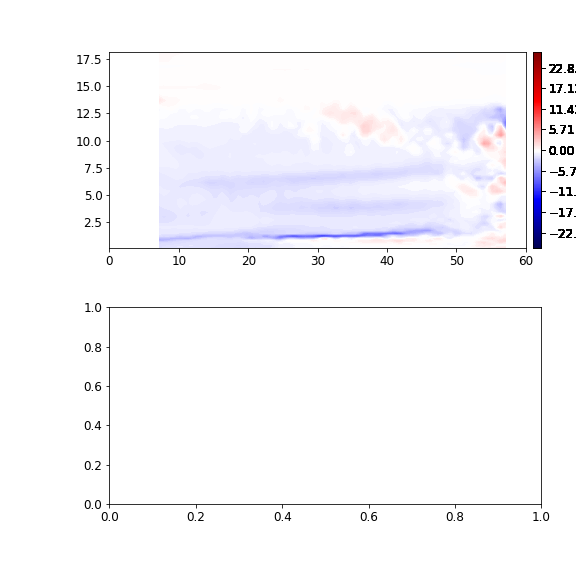

/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


interactive(children=(IntSlider(value=10, description='Time', max=99, min=10), Output()), _dom_classes=('widge…

In [17]:
%matplotlib nbagg

print("showing conditional distribution of 2D variable")

fig,axs = plt.subplots(nrows=2,figsize=(8,8))
i_tmin = 10

# min-max values of conditional mean
mins = [np.nanmin(cond_dist_3D.cond_distributions[i_t].cond_mean) for i_t in range(nt)]
maxs = [np.nanmax(cond_dist_3D.cond_distributions[i_t].cond_mean) for i_t in range(nt)]
vmax = max(abs(np.max(maxs)),abs(np.min(mins)))
vmin = -vmax
# max value of relative error
mins = [np.nanmin(np.absolute(d.cond_mean)/d.cond_std) for d in cond_dist_3D.cond_distributions]
maxs = [np.nanmax(np.absolute(d.cond_mean)/d.cond_std) for d in cond_dist_3D.cond_distributions]
vmax_err = max(abs(np.max(maxs)),abs(np.min(mins)))
vmin_err = 0
norm_err = MidpointNormalize(midpoint=1,vmin=vmin_err,vmax=vmax_err)

def show(i_t = i_tmin):
    
    # Clear plot between each display
    axs[0].cla()

    d = cond_dist_3D.cond_distributions[i_t]
    ## Data
    x = d.on.percentiles
    y = ds_3D.z/1000
    # mean
    Z = d.cond_mean
    # err
    Z_err = np.absolute(d.cond_mean)/d.cond_std

    ## Plot
    h = subplotSmooth2D(axs[0],x,\
                      y,\
                      Z,\
                   fplot='contourf',\
                   vmin=vmin,vmax=vmax,nlev=200,\
                   xmin=0,xmax=60,nx=100,\
                   cmap = plt.cm.seismic)

    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cbar1 = fig.colorbar(h, cax=cax, orientation='vertical')

    h = subplotSmooth2D(axs[1],x,\
                      y,\
                      Z_err,\
                   fplot='contourf',\
    #                xmin=10,xmax=40,nx=100,\
                   vmin=vmin_err,vmax=vmax_err,nlev=200,\
                   cmap = plt.cm.RdYlGn,\
                   norm=norm_err)

    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cbar2 = fig.colorbar(h, cax=cax, orientation='vertical')

    for ax in axs:
        ax.set_xlabel(ref_varid)
        ax.set_ylabel('z (km)')

    axs[0].set_title('Conditional mean of %s|%s'%(cond_varid_3D,ref_varid))
    axs[1].set_title('Conditional error of %s|%s'%(cond_varid_3D,ref_varid))

    plt.show()
    

i_t = widgets.IntSlider(min=i_tmin,max=nt-1,step=1,value=0,description='Time')

interact(show,i_t=i_t);